# Linear_Regression

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

## 隨機生成sample data
Generate sample data

In [44]:
np.random.seed(1000)


nb_samples = 400

In [45]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    ax.scatter(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid()

    plt.show()

## 定義Gradient descent
Define gradient descent

In [46]:
def gradient(v):
    gr = np.zeros(shape=2)
    for i in range(nb_samples):
        gr[0] += (v[0] + v[1]*X[i] - Y[i])
        gr[1] += ((v[0] + v[1]*X[i] - Y[i]) * X[i])
    return gr

## 定義Loss function
Define loss function

In [47]:
def loss(v):
    err = 0.0
    for i in range(nb_samples):
        err += np.square(v[0] + v[1]*X[i] - Y[i])
    return 0.5 * err

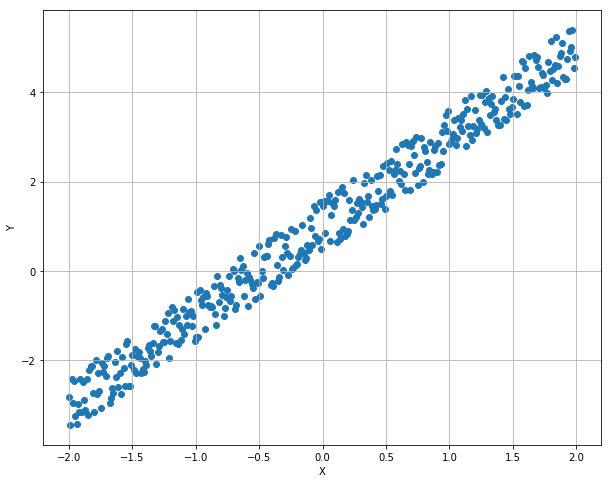

斜率:
y = 1.99x +  1
絕對均方差: 124.98


In [48]:
if __name__ == '__main__':

    X = np.arange(-2, 2, 0.01)
    #y=ax+b,a=2,b=1
    Y = 2*X+1
    Y += np.random.uniform(-0.6, 0.6, size=nb_samples)
    show_dataset(X, Y)
    # 最小化成本函數
    result = minimize(fun=loss, x0=np.array([0.0, 0.0]), 
                      jac=gradient, method='L-BFGS-B')
    print('斜率:')
    print('y = %.2fx + %2.f' % (result.x[1], result.x[0]))
    # 計算均方差
    err = 0.0
    for i in range(nb_samples):
        err += np.abs(Y[i] - (result.x[1]*X[i] + result.x[0]))

    print('絕對均方差: %.2f' % err)